# Import Library

In [32]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt

# Data Overview

In [33]:
df = pd.read_csv('Telco_Customer_Engineeredv1.csv')

In [34]:
df.head().style.background_gradient()

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR),Total Purchase,Purchase Per Tenure Month,Num Product Used
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005000,Yes,106.816666,-6.200000,4210.700000,140.010000,35.002500,2
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910000,Yes,106.816666,-6.200000,3511.300000,183.820000,45.955000,0
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545000,Yes,106.816666,-6.200000,6983.600000,1036.360000,16.193125,2
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240000,Yes,106.816666,-6.200000,6503.900000,3814.720000,4.865714,2
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810000,Yes,106.816666,-6.200000,6942.000000,6605.690000,2.751224,3


In [35]:
df.shape

(7043, 19)

In [36]:
df['Tenure Months'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: Tenure Months, Length: 73, dtype: int64

The minority class (churned) covers 26% proportion of the dataset, this indicate the mildly imbalanced dataset.

In [37]:
df['Churn Label'].value_counts(normalize=True)*100

No     73.463013
Yes    26.536987
Name: Churn Label, dtype: float64

# Data Cleaning

### Null

In [38]:
df.isnull().sum()

Customer ID                     0
Tenure Months                   0
Location                        0
Device Class                    0
Games Product                   0
Music Product                   0
Education Product               0
Call Center                     0
Video Product                   0
Use MyApp                       0
Payment Method                  0
Monthly Purchase (Thou. IDR)    0
Churn Label                     0
Longitude                       0
Latitude                        0
CLTV (Predicted Thou. IDR)      0
Total Purchase                  0
Purchase Per Tenure Month       0
Num Product Used                0
dtype: int64

### Duplicate

In [39]:
df.duplicated().sum()

0

### Outliers

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
numerical_cols = df.select_dtypes(exclude='object').columns
# exclude ID, Longitude, Latitude
numerical_cols = list(set(numerical_cols)-(set(['Customer ID', 'Longitude', 'Latitude'])))
numerical_cols

['CLTV (Predicted Thou. IDR)',
 'Total Purchase',
 'Purchase Per Tenure Month',
 'Tenure Months',
 'Monthly Purchase (Thou. IDR)',
 'Num Product Used']

### Double Axis

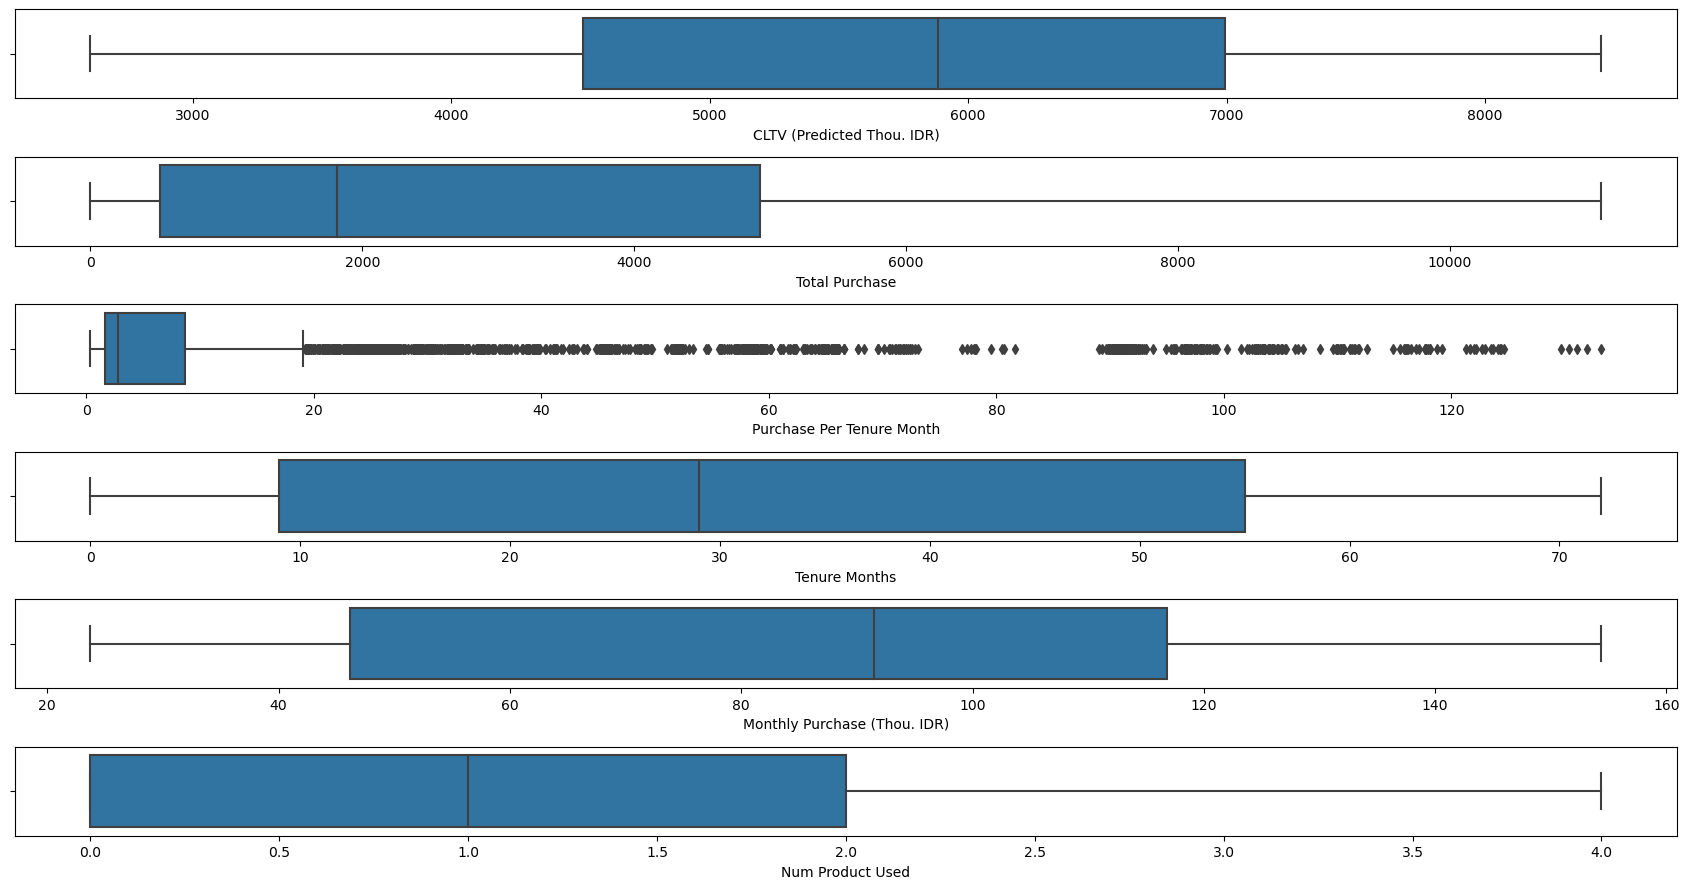

In [42]:
fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(17, 9))

for i in range(len(numerical_cols)):
    sns.boxplot(x=df[numerical_cols[i]], ax=axes[i])
    plt.tight_layout()

In [43]:
df['Purchase Per Tenure Month'] = np.log(df['Purchase Per Tenure Month'])

# EDA

## Descriptive Statistics

In [44]:
df.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
Customer ID,7043.000000,3521.000000,2033.283305,0.000000,1760.500000,3521.000000,5281.500000,7042.000000
Tenure Months,7043.000000,32.371149,24.559481,0.000000,9.000000,29.000000,55.000000,72.000000
Monthly Purchase (Thou. IDR),7043.000000,84.190200,39.117061,23.725000,46.150000,91.455000,116.805000,154.375000
Longitude,7043.000000,107.043246,0.358316,106.816666,106.816666,106.816666,107.609810,107.609810
Latitude,7043.000000,-6.404184,0.322898,-6.914744,-6.914744,-6.200000,-6.200000,-6.200000
CLTV (Predicted Thou. IDR),7043.000000,5720.384481,1537.974298,2603.900000,4509.700000,5885.100000,6994.650000,8450.000000
Total Purchase,7043.000000,2963.455755,2944.148280,0.000000,512.200000,1811.680000,4921.930000,11115.000000
Purchase Per Tenure Month,7043.000000,1.370969,1.347641,-1.054197,0.507734,1.027832,2.155655,4.891739
Num Product Used,7043.000000,1.359790,1.288000,0.000000,0.000000,1.000000,2.000000,4.000000


In [45]:
df.describe(exclude=[np.number]).T.style.background_gradient()

,count,unique,top,freq
Location,7043,2,Jakarta,5031
Device Class,7043,3,High End,3096
Games Product,7043,3,No,3498
Music Product,7043,3,No,3088
Education Product,7043,3,No,3095
Call Center,7043,2,No,4999
Video Product,7043,3,No,2810
Use MyApp,7043,3,No,2785
Payment Method,7043,4,Pulsa,2365
Churn Label,7043,2,No,5174


## Univariate Analysis

### Distribution

#### Numerical Features

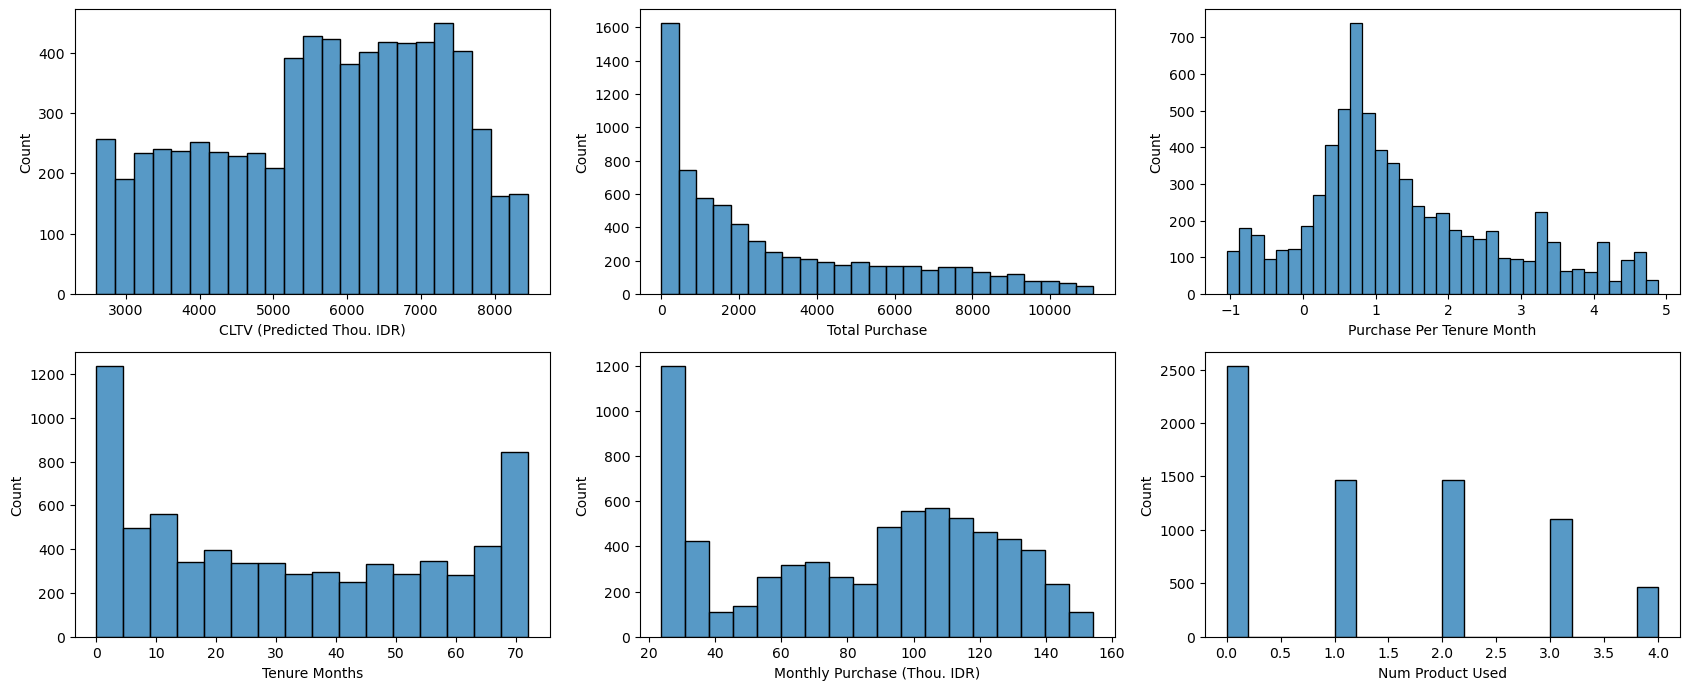

In [46]:
# Create Distplot for Each Numerical Feature
plt.figure(figsize=(17,10))
for i in range(0, len(numerical_cols)):
    plt.subplot(3, 3, i+1)
    sns.histplot(x=df[numerical_cols[i]])
    plt.xlabel(numerical_cols[i])
    plt.tight_layout()
plt.show()

#### Categorical Features

In [47]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['Location', 'Device Class', 'Games Product', 'Music Product',
       'Education Product', 'Call Center', 'Video Product', 'Use MyApp',
       'Payment Method', 'Churn Label'],
      dtype='object')

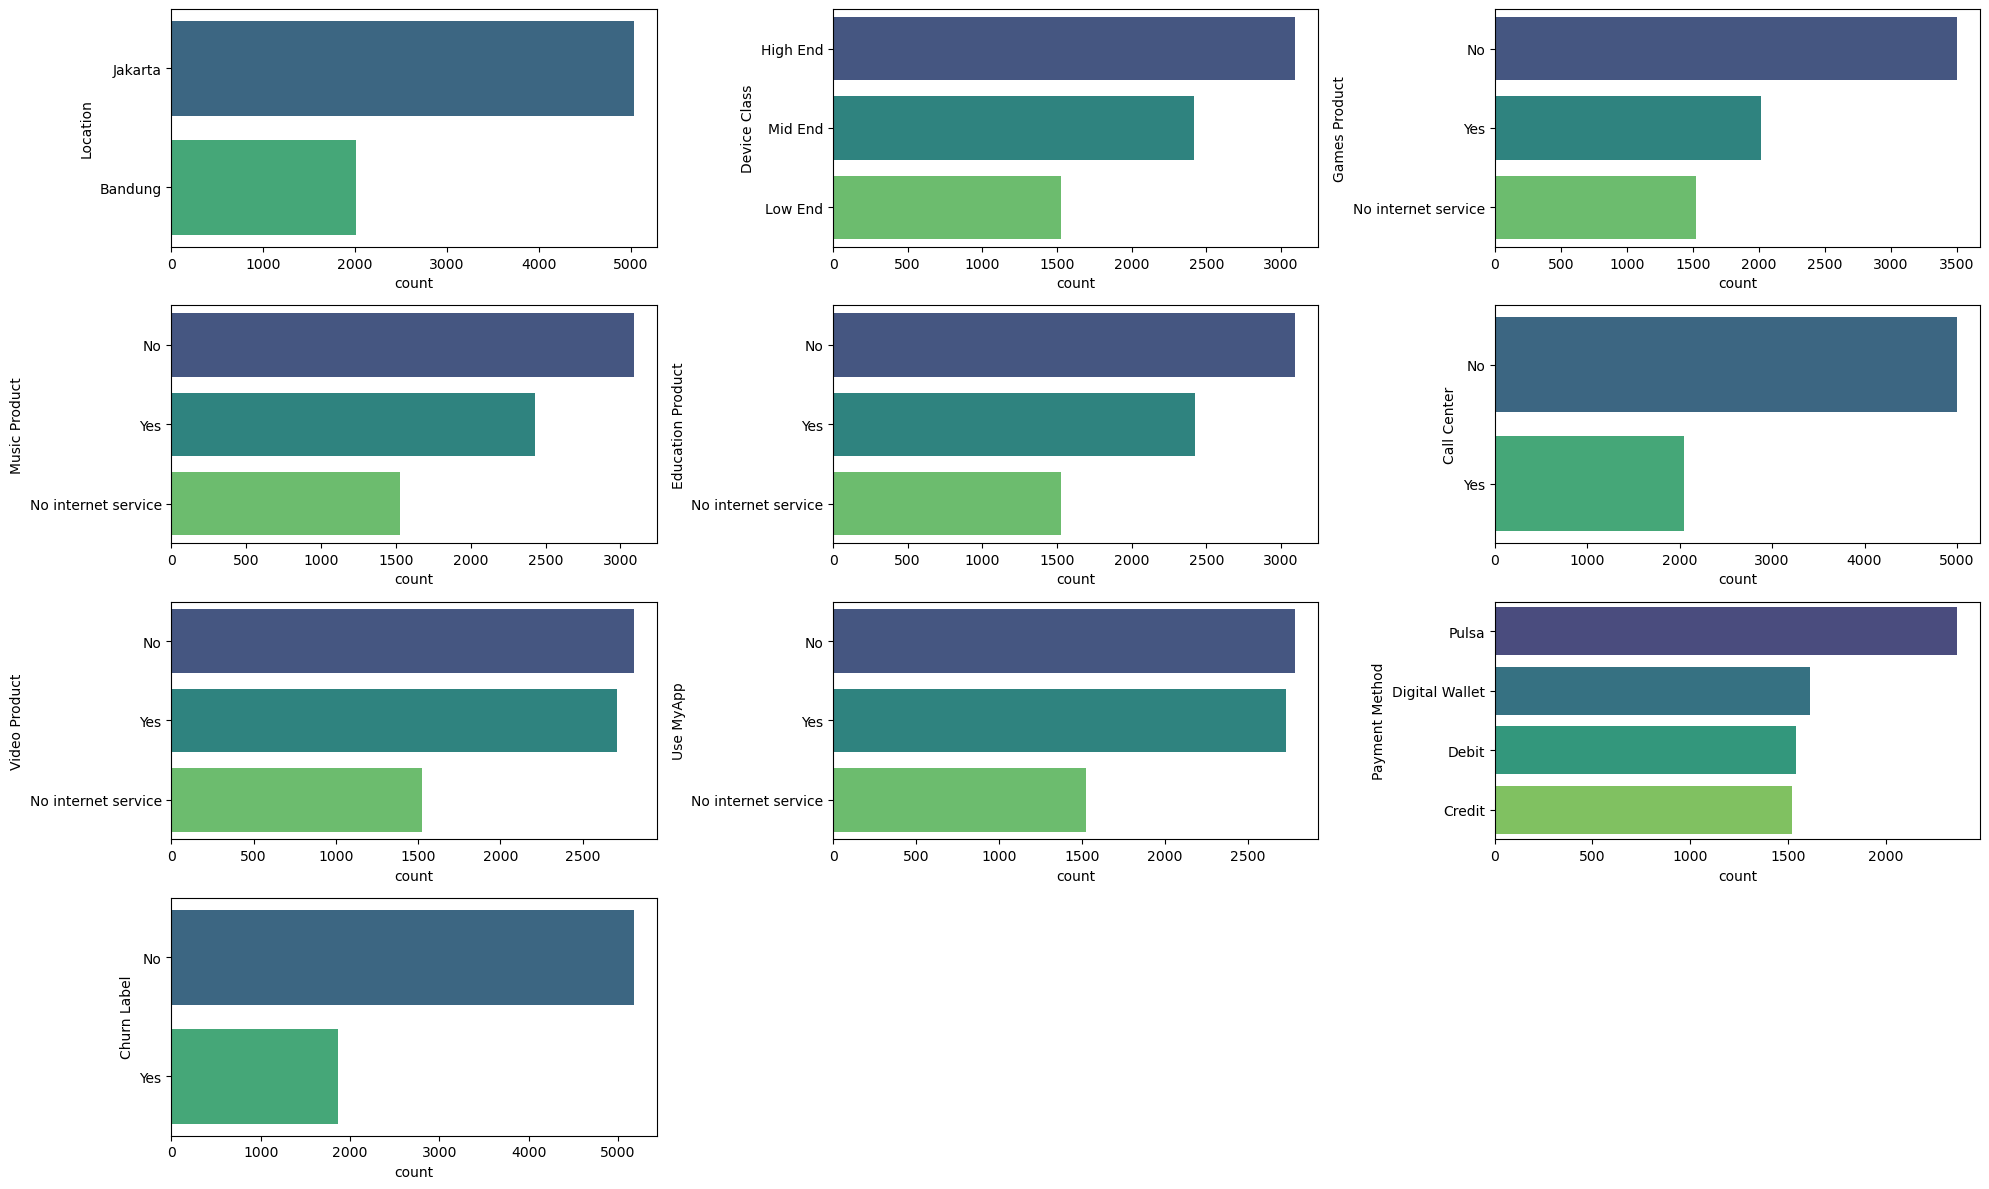

In [48]:
# Create Countplot for Each Categorical Feature
fig, axes = plt.subplots(4, 3, figsize=(20,12))
xy = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2), (2,0), (2,1), (2,2), (3,0), (3,1), (3,2), (4,0)]

for i in range(len(cat_cols)):
    if i == 0:
        sns.countplot(y=df[cat_cols[i]], palette='viridis',ax=axes[xy[i]])
    else:
        sns.countplot(y=df[cat_cols[i]], palette='viridis', order= df[cat_cols[i]].value_counts().index, ax=axes[xy[i]])
axes[3, 1].axis('off')
axes[3, 2].axis('off')
plt.tight_layout()

## Bivariate Analysis

#### Numerical Feature

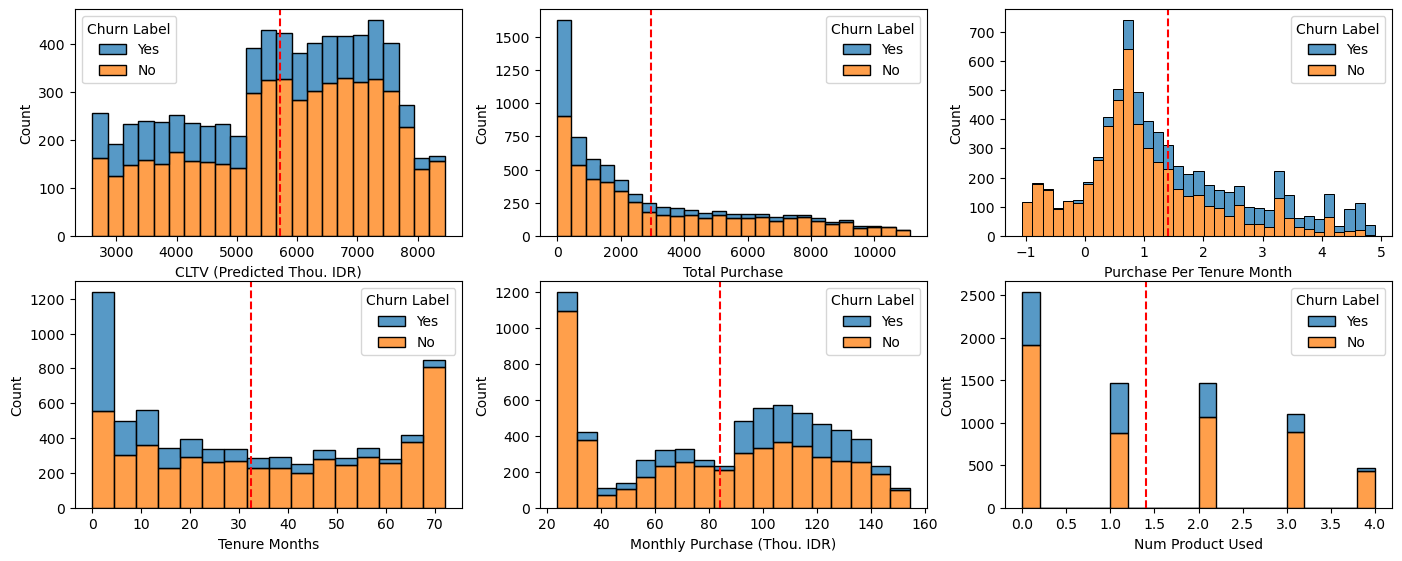

In [49]:
x_text_coor = [35, 5800, 100]
y_text_coor = [800, 450, 800]
# Create Distplot for Each Numerical Feature
plt.figure(figsize=(17,10))
for i in range(0, len(numerical_cols)):
    plt.subplot(3, 3, i+1)
    sns.histplot(x=df[numerical_cols[i]], hue=df['Churn Label'], multiple='stack')
    plt.xlabel(numerical_cols[i])
    
    mean=round(df[numerical_cols[i]].mean(), 1)
    plt.axvline(mean, color='red', linestyle='--') 
    #plt.text(x_text_coor[i], y_text_coor[i], f'mean={mean}', color='red', ha='left', va='top')
    #plt.tight_layout()

In [50]:
df['Total Purchase Per Tenure Month'] = df['Total Purchase']/df['Tenure Months']

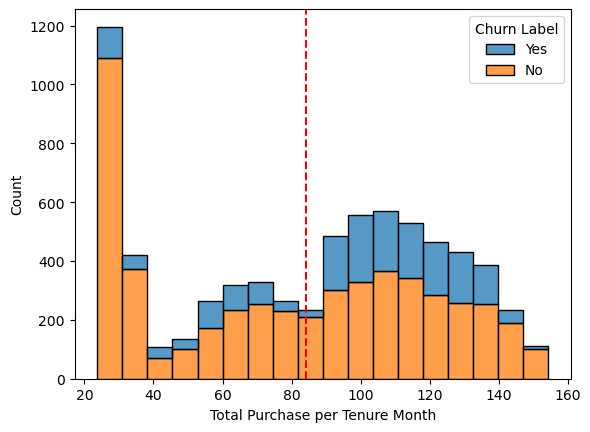

In [51]:
sns.histplot(x=df['Total Purchase Per Tenure Month'], hue=df['Churn Label'], multiple='stack')
plt.xlabel('Total Purchase per Tenure Month')

mean=round(df['Total Purchase Per Tenure Month'].mean(), 1)
plt.axvline(mean, color='red', linestyle='--') 

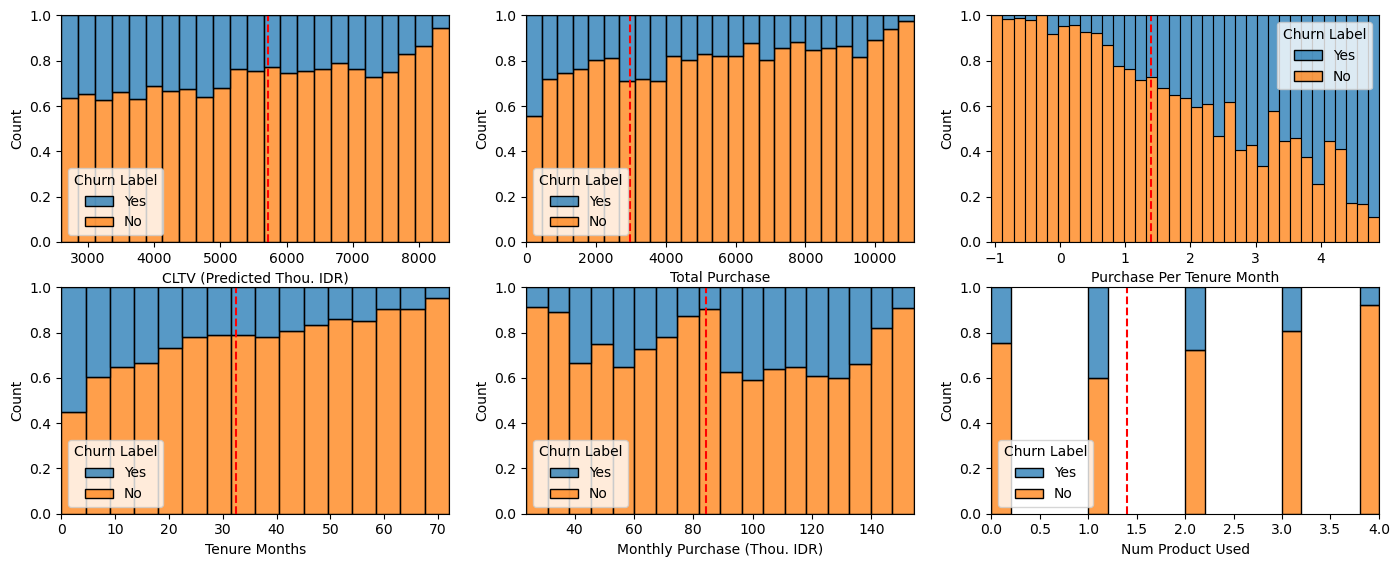

In [52]:
x_text_coor = [35, 5800, 100]
y_text_coor = [800, 450, 800]
# Create Distplot for Each Numerical Feature
plt.figure(figsize=(17,10))
for i in range(0, len(numerical_cols)):
    plt.subplot(3, 3, i+1)
    sns.histplot(x=df[numerical_cols[i]], hue=df['Churn Label'], multiple='fill')
    plt.xlabel(numerical_cols[i])
    
    mean=round(df[numerical_cols[i]].mean(), 1)
    plt.axvline(mean, color='red', linestyle='--') 
    #plt.text(x_text_coor[i], y_text_coor[i], f'mean={mean}', color='red', ha='left', va='top')
    #plt.tight_layout()

#### Categorical Features

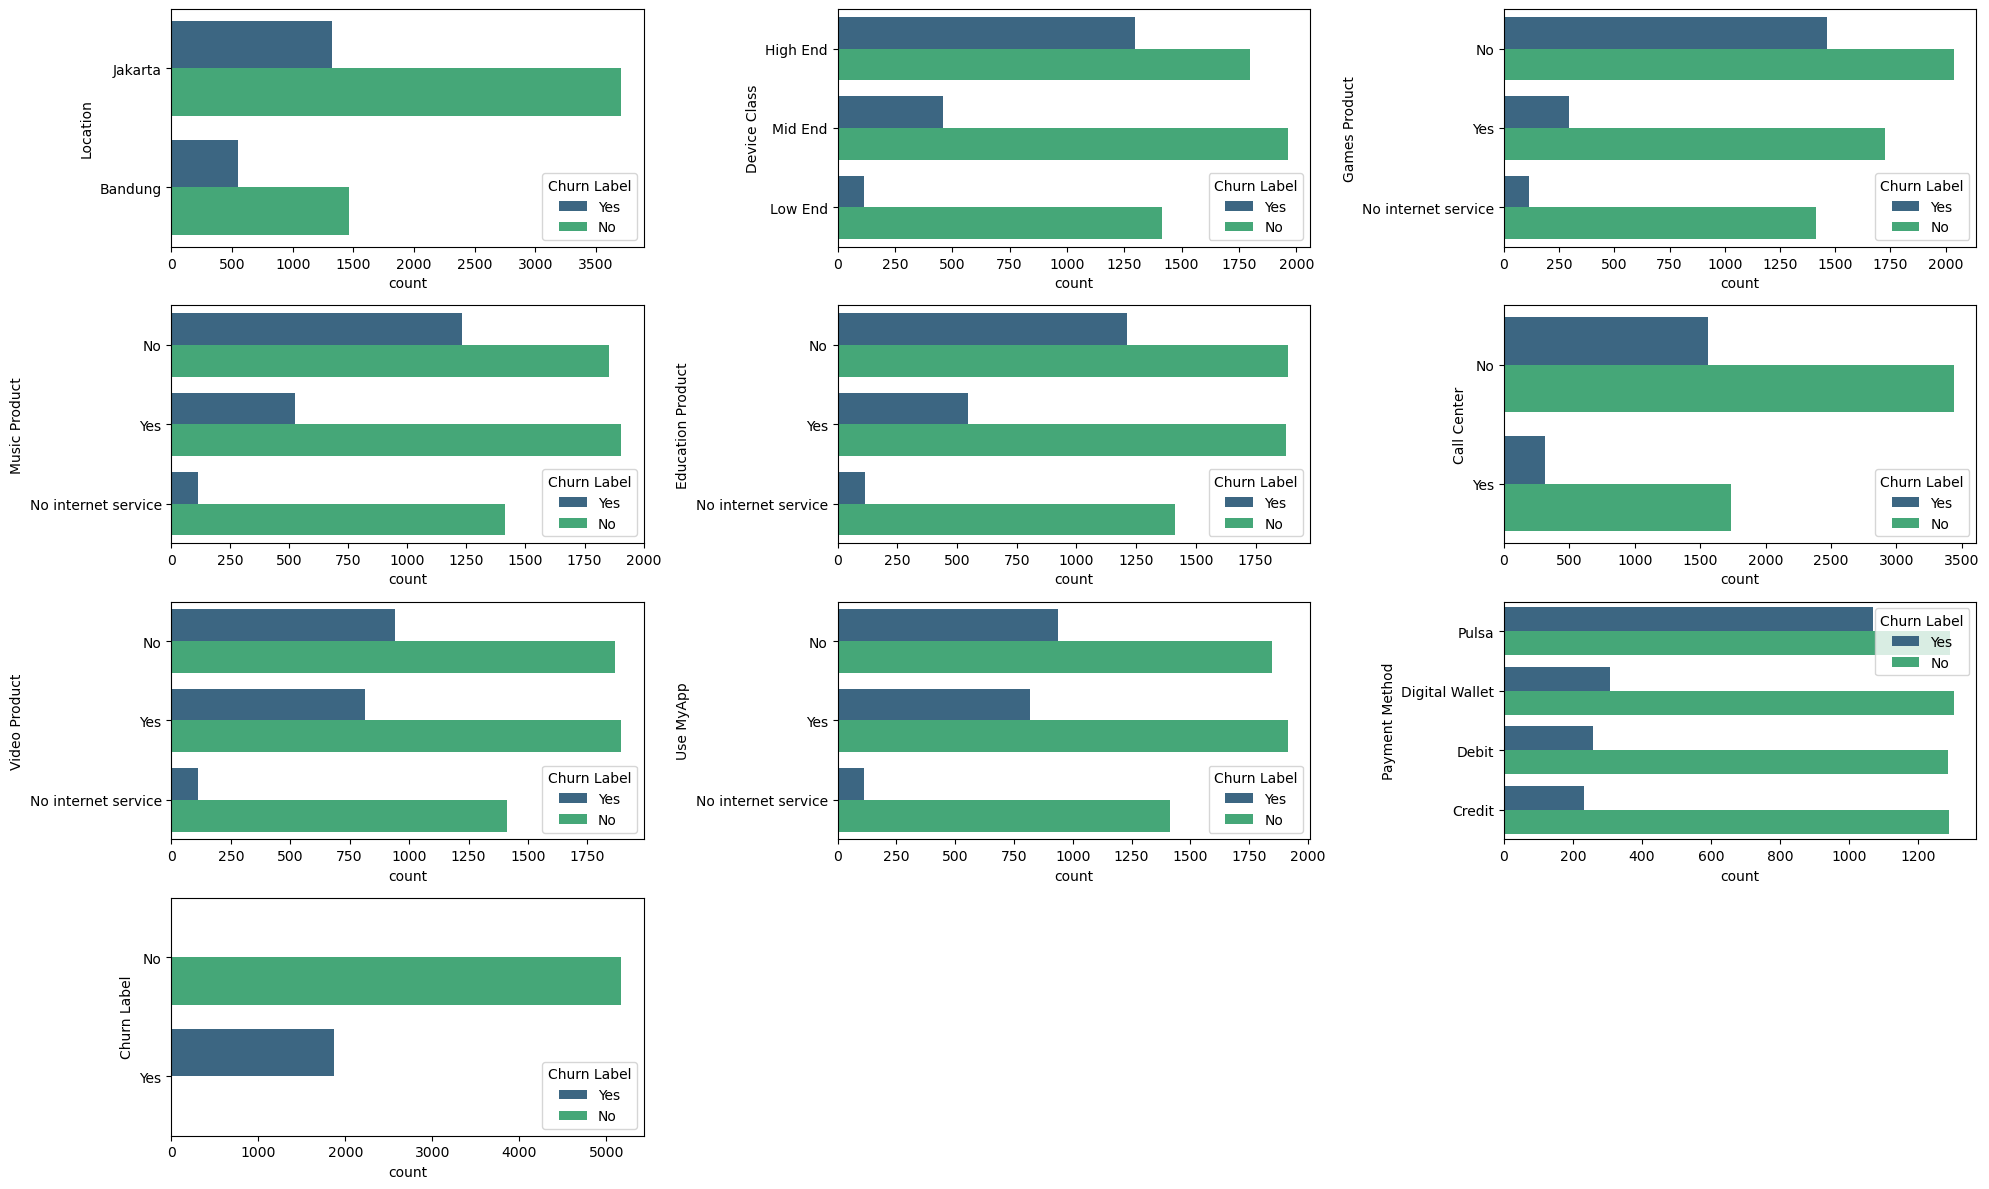

In [53]:
# Create Countplot for Each Categorical Feature
fig, axes = plt.subplots(4, 3, figsize=(20,12))
xy = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2), (2,0), (2,1), (2,2), (3,0), (3,1), (3,2), (4,0)]

for i in range(len(cat_cols)):
    if i == 0:
        sns.countplot(y=df[cat_cols[i]], palette='viridis',ax=axes[xy[i]], hue=df['Churn Label'])
    else:
        sns.countplot(y=df[cat_cols[i]], palette='viridis', order= df[cat_cols[i]].value_counts().index, ax=axes[xy[i]], hue=df['Churn Label'])
axes[3, 1].axis('off')
axes[3, 2].axis('off')
plt.tight_layout()

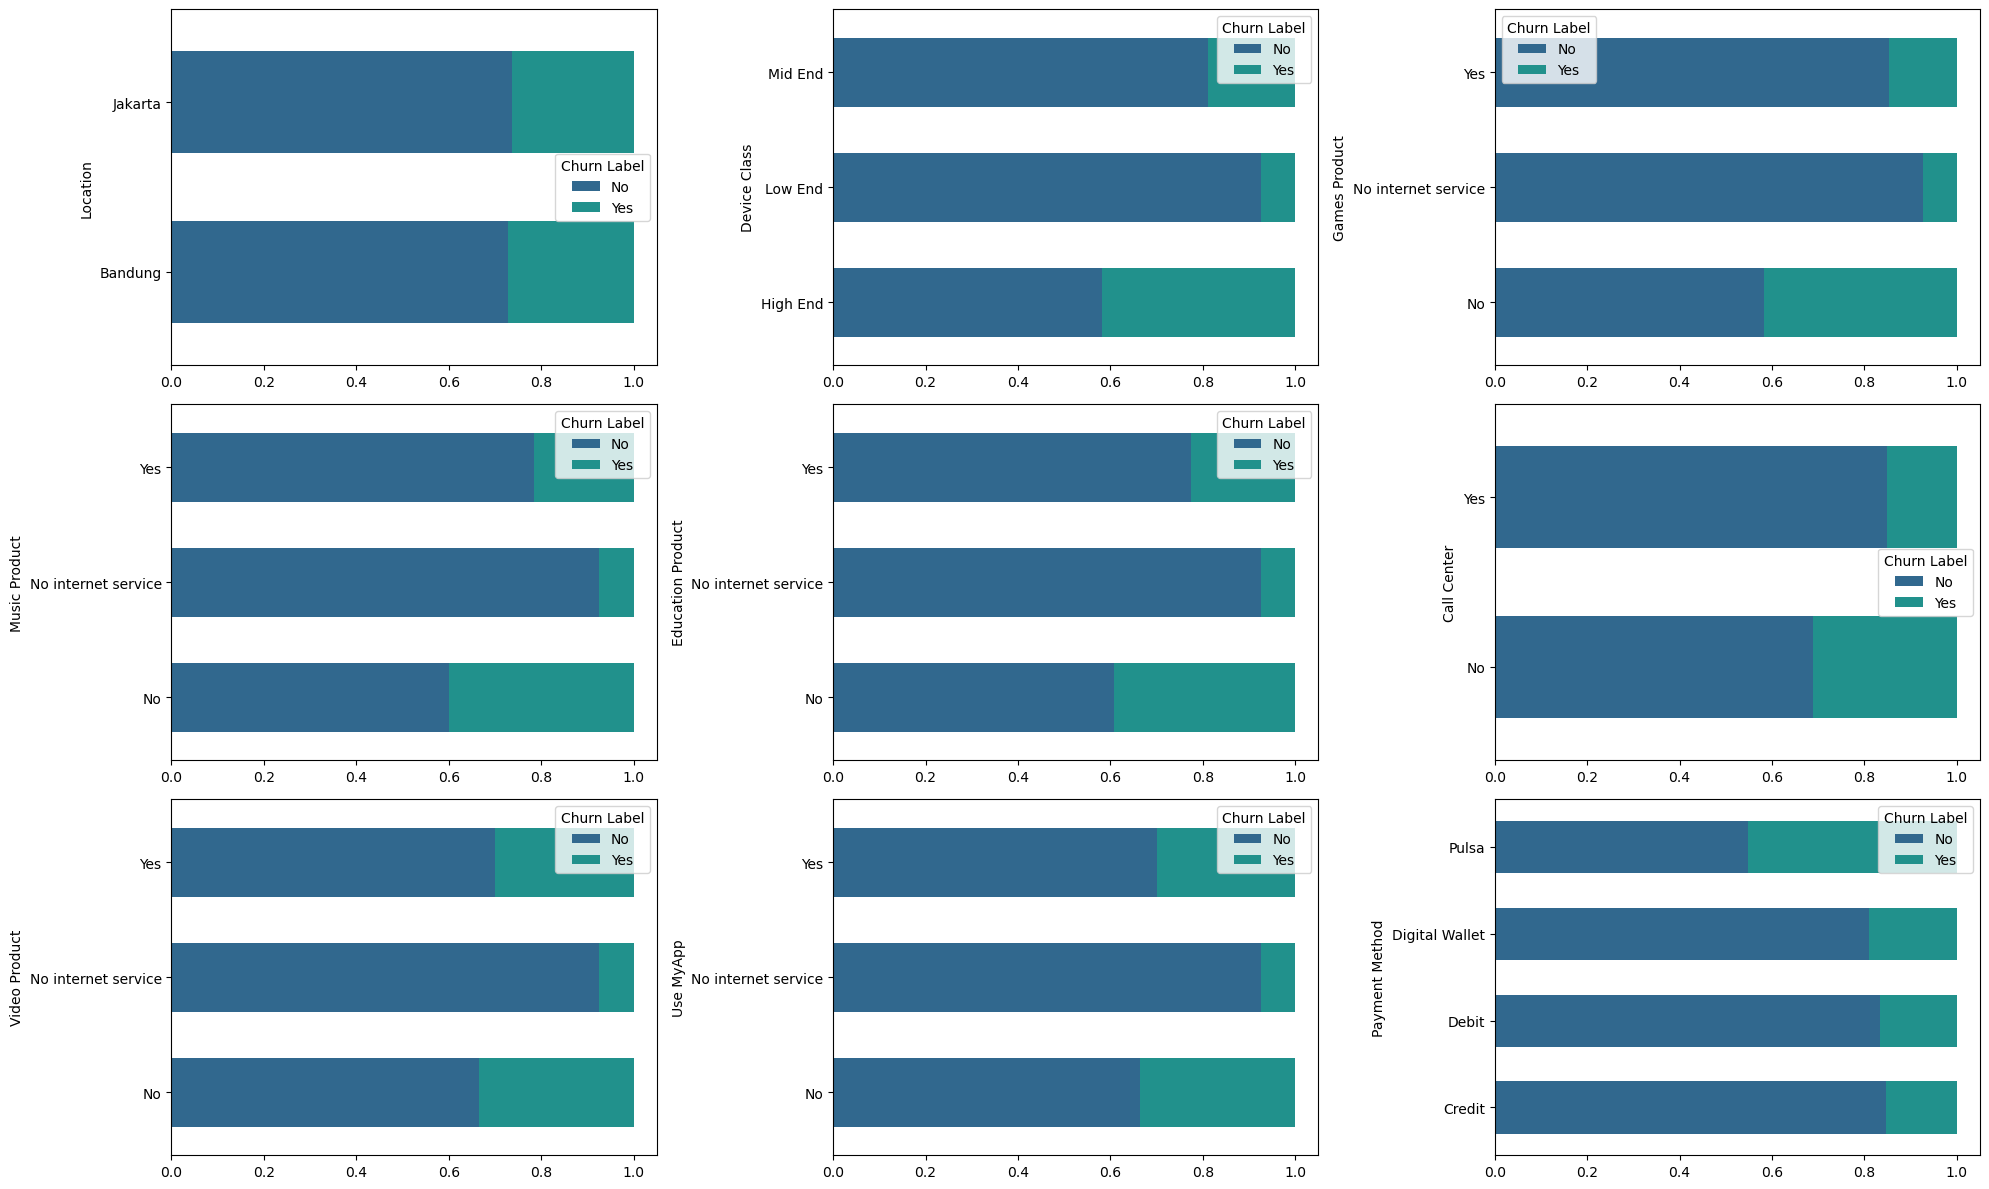

In [54]:
# Create 100% Stacked Bar Chart for Each Categorical Feature
fig, ax = plt.subplots(3, 3, figsize=(20,12))
xy = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2), (2,0), (2,1), (2,2), (3,0), (3,1), (3,2), (4,0)]

for i in range(len(cat_cols)-1):
    sbc = pd.crosstab(df[cat_cols[i]], df['Churn Label'])
    sbc = sbc.div(sbc.sum(axis=1).astype(float), axis=0)
    sbc.plot(kind='barh', stacked=True, color = ['#31688e', '#21918c'], width = 0.6, ax = ax[xy[i]])
    #ax[xy[i]].legend().remove()

plt.tight_layout()
# not_churn = mlp.patches.Patch(color='#31688e', label='Not Churn')
# churn = mlp.patches.Patch(color='#21918c', label='Churn')
# plt.legend(handles=[not_churn, churn], fontsize=14)

### Pulsa vs Categorical Features

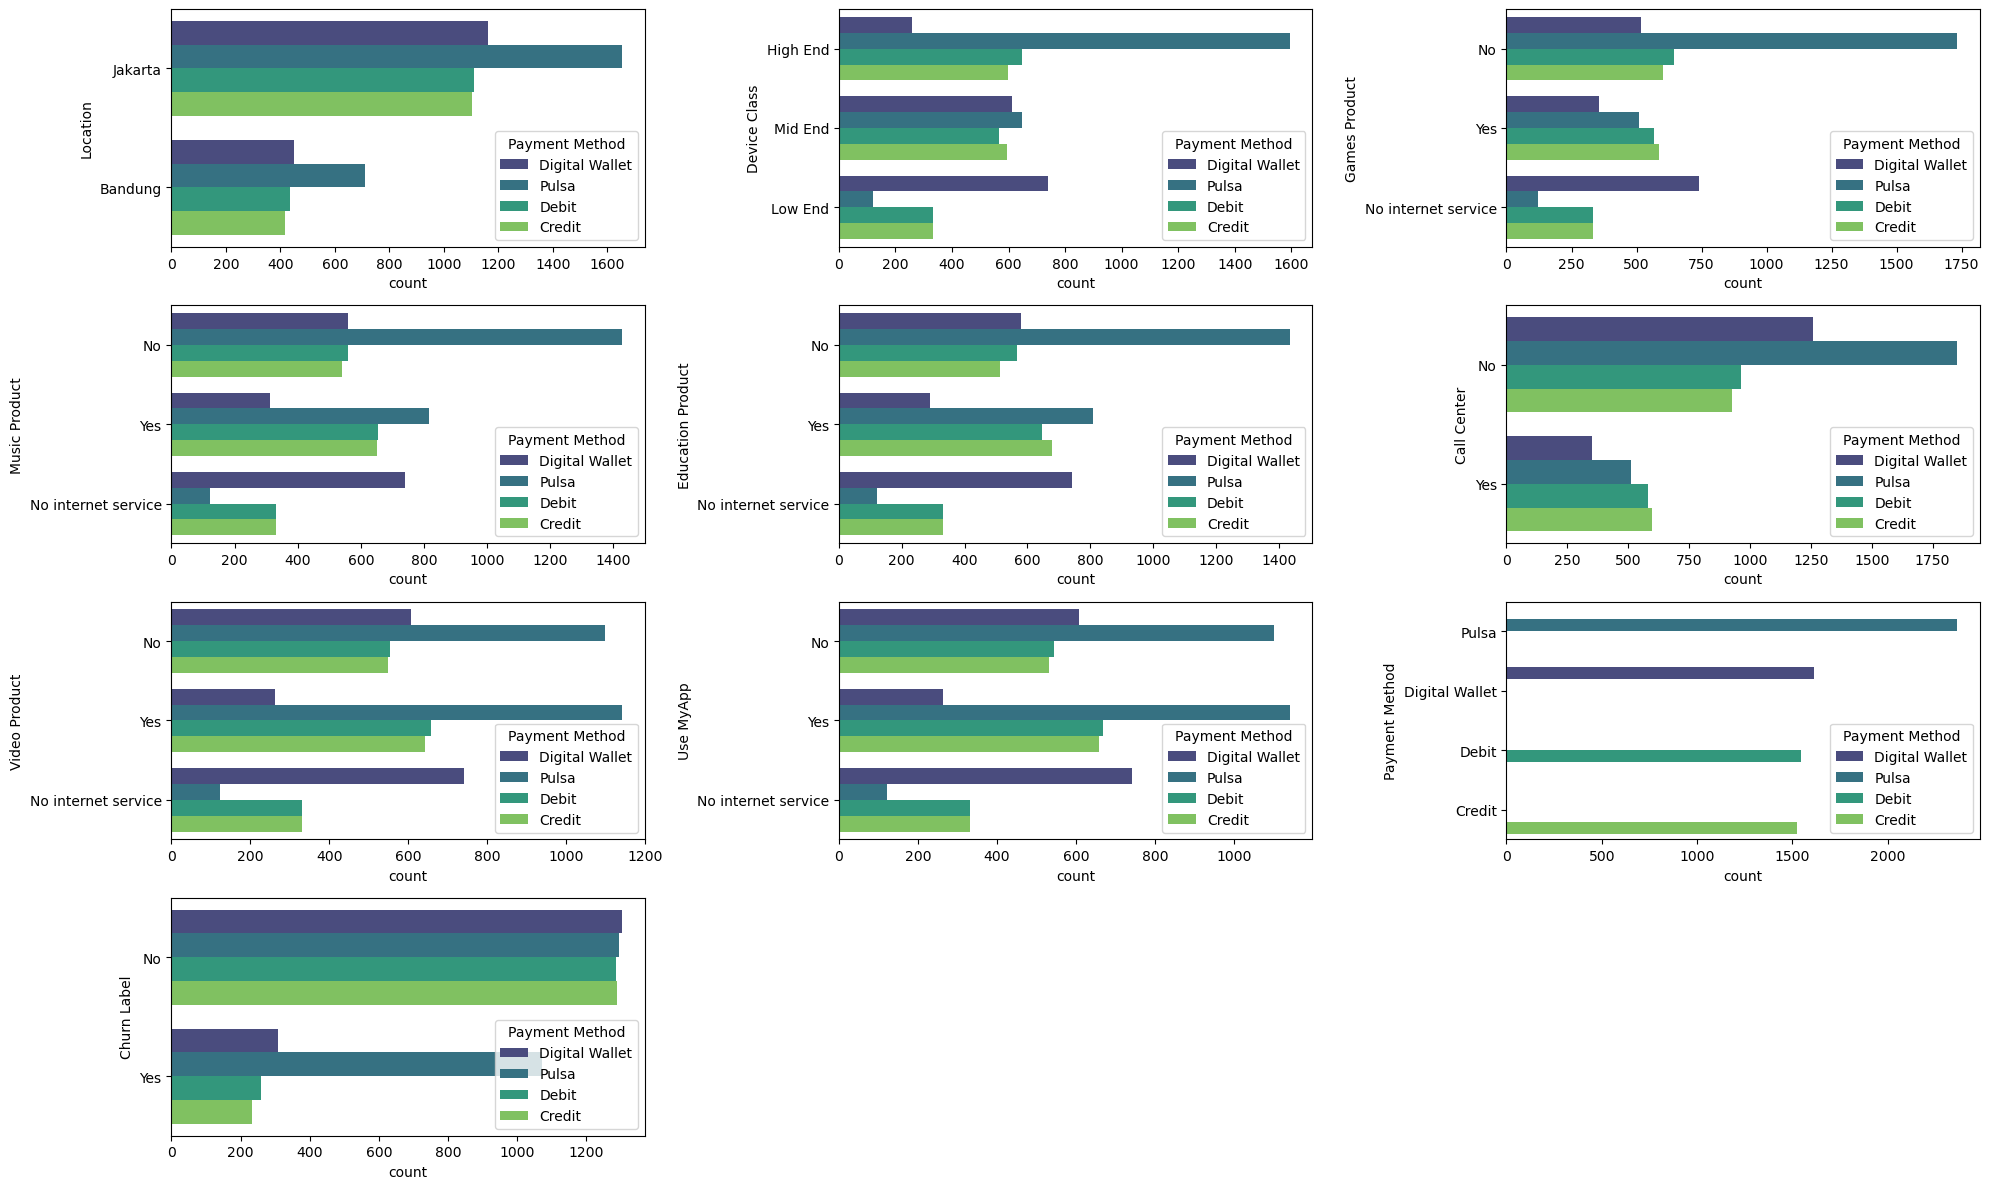

In [55]:
# Create Countplot for Each Categorical Feature
fig, axes = plt.subplots(4, 3, figsize=(20,12))
xy = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2), (2,0), (2,1), (2,2), (3,0), (3,1), (3,2), (4,0)]

for i in range(len(cat_cols)):
    if i == 0:
        sns.countplot(y=df[cat_cols[i]], palette='viridis',ax=axes[xy[i]], hue=df['Payment Method'])
    else:
        sns.countplot(y=df[cat_cols[i]], palette='viridis', order= df[cat_cols[i]].value_counts().index, ax=axes[xy[i]], hue=df['Payment Method'])
axes[3, 1].axis('off')
axes[3, 2].axis('off')
plt.tight_layout()

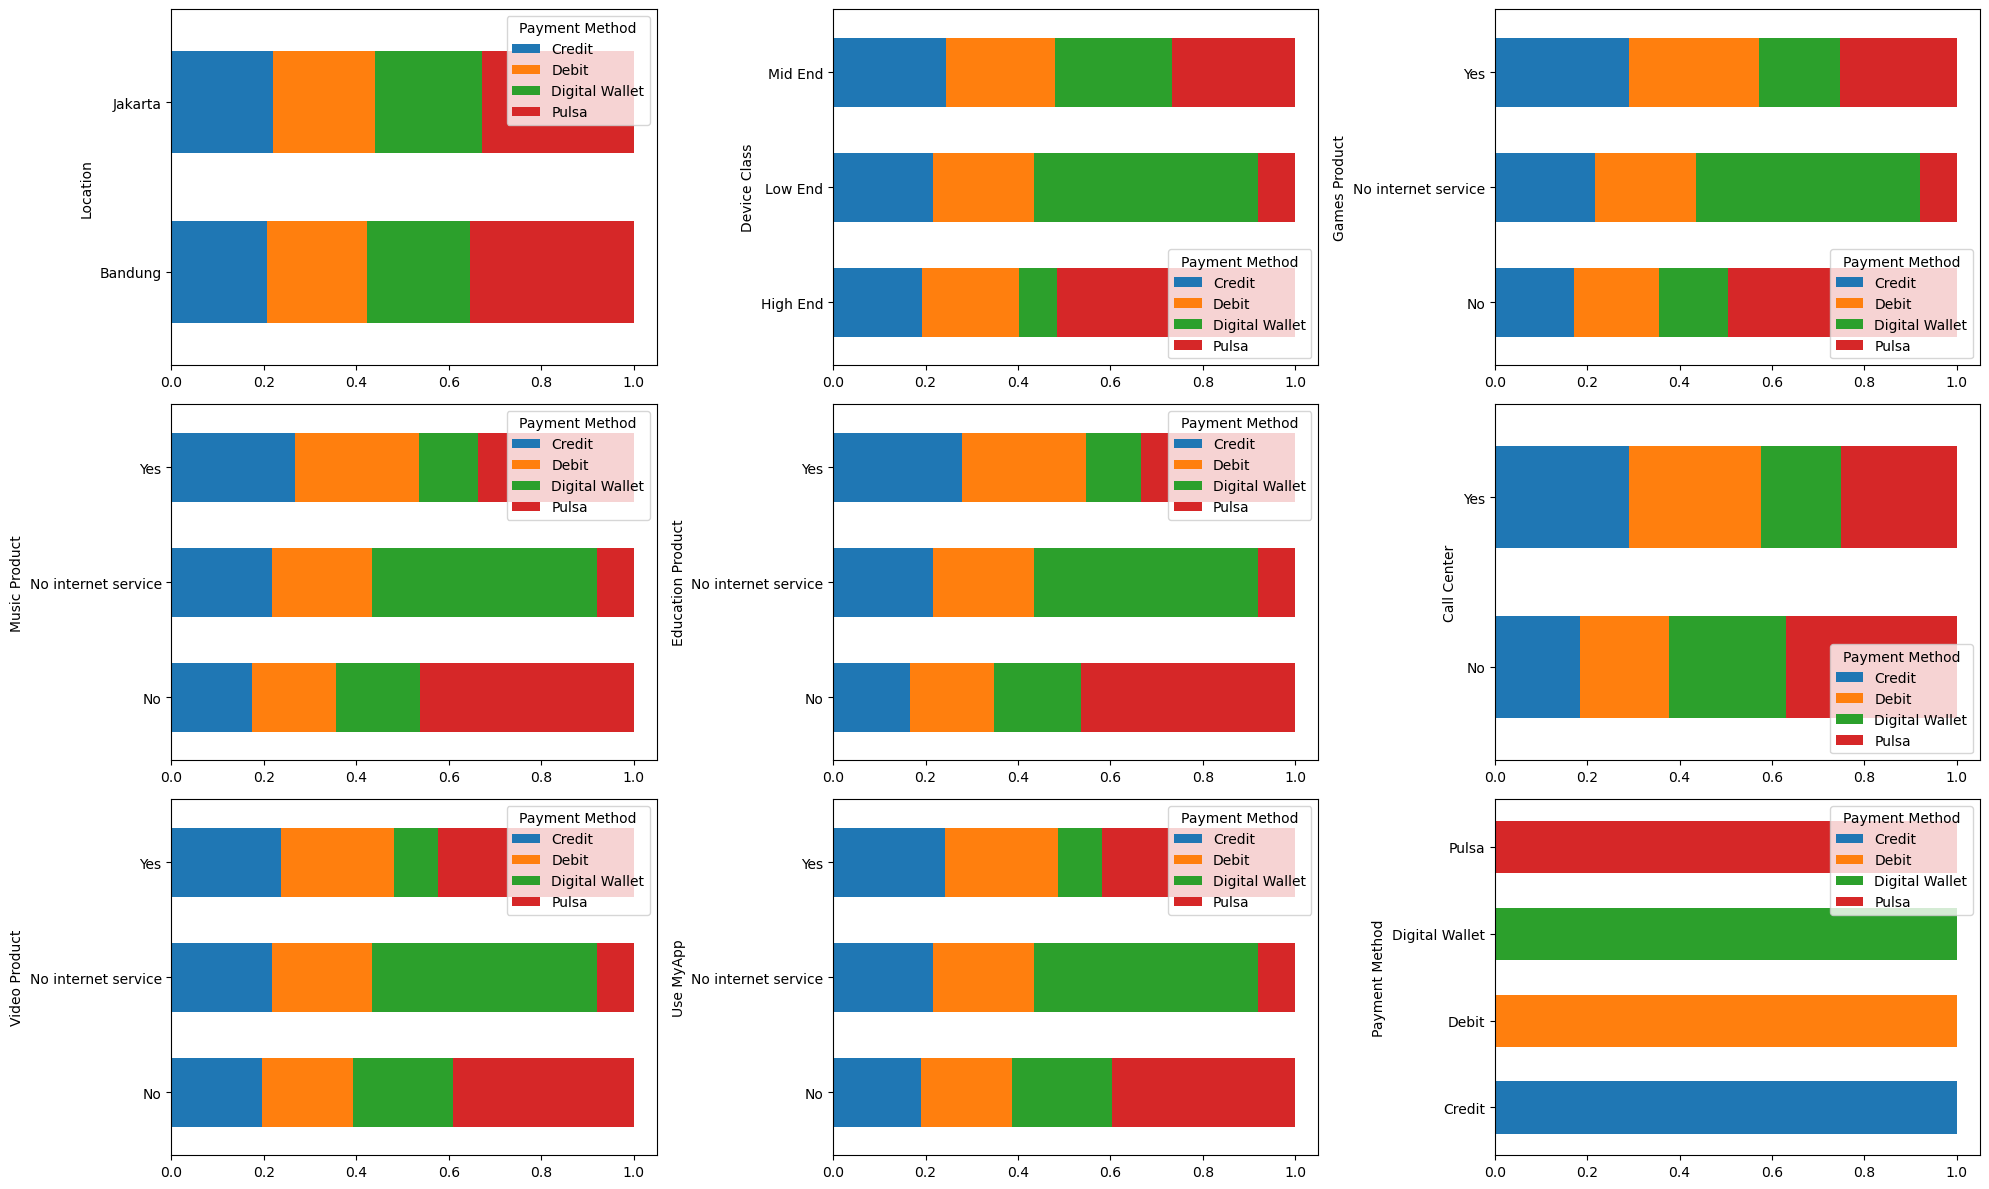

In [56]:
# Create 100% Stacked Bar Chart for Each Categorical Feature
fig, ax = plt.subplots(3, 3, figsize=(20,12))
xy = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2), (2,0), (2,1), (2,2), (3,0), (3,1), (3,2), (4,0)]

for i in range(len(cat_cols)-1):
    sbc = pd.crosstab(df[cat_cols[i]], df['Payment Method'])
    sbc = sbc.div(sbc.sum(axis=1).astype(float), axis=0)
    sbc.plot(kind='barh', stacked=True, width = 0.6, ax = ax[xy[i]])
    #ax[xy[i]].legend().remove()

plt.tight_layout()

## Multivariate Analysis

#### Pair Plot

<Figure size 1500x1500 with 0 Axes>

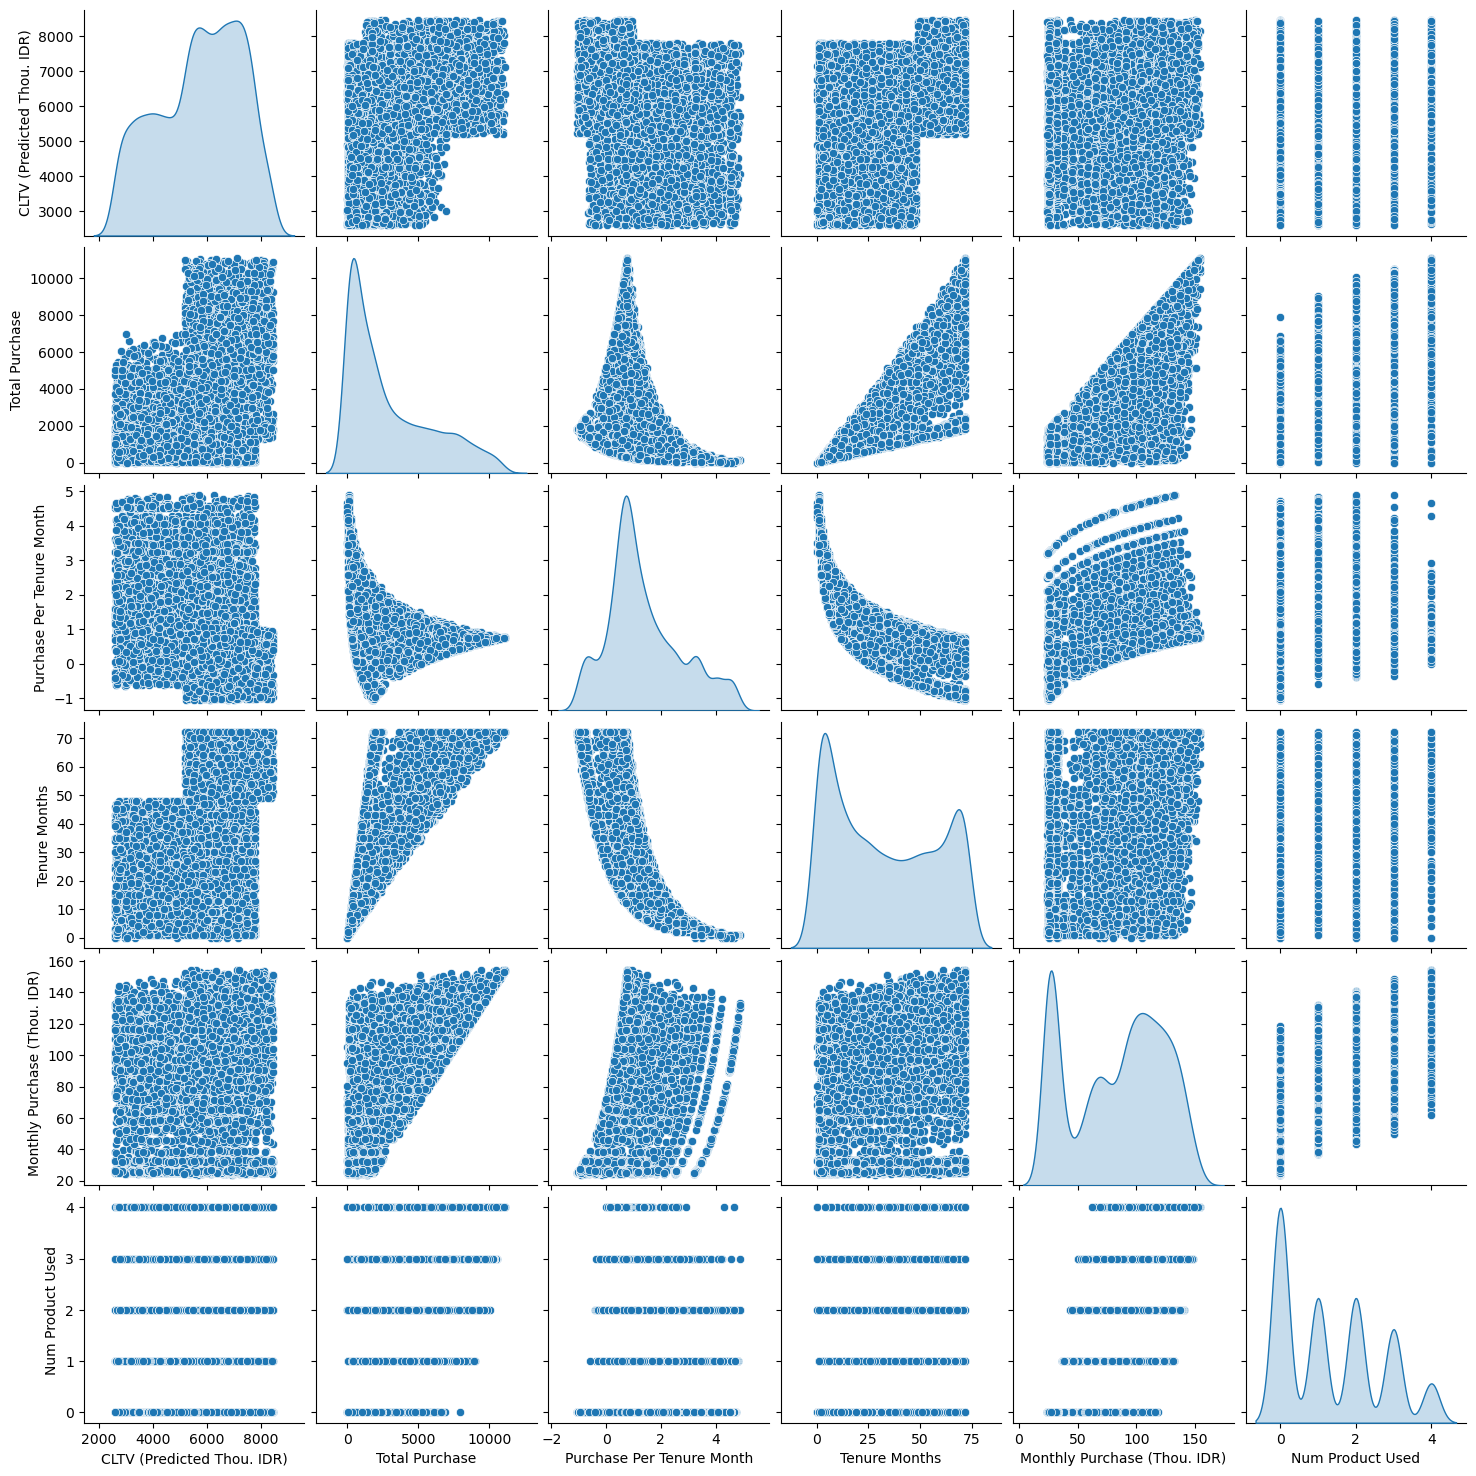

In [57]:
# create pairplot
plt.figure(figsize=(15, 15))
sns.pairplot(df[numerical_cols], diag_kind='kde')

In [58]:
df_copy = df.copy()

In [59]:
df_copy['Games Product'].replace({'No internet service': 'No'}, inplace=True)
df_copy['Music Product'].replace({'No internet service': 'No'}, inplace=True)
df_copy['Education Product'].replace({'No internet service': 'No'}, inplace=True)
df_copy['Video Product'].replace({'No internet service': 'No'}, inplace=True)
df_copy['Use MyApp'].replace({'No internet service': 'No'}, inplace=True)

In [60]:
df_copy.columns

Index(['Customer ID', 'Tenure Months', 'Location', 'Device Class',
       'Games Product', 'Music Product', 'Education Product', 'Call Center',
       'Video Product', 'Use MyApp', 'Payment Method',
       'Monthly Purchase (Thou. IDR)', 'Churn Label', 'Longitude', 'Latitude',
       'CLTV (Predicted Thou. IDR)', 'Total Purchase',
       'Purchase Per Tenure Month', 'Num Product Used',
       'Total Purchase Per Tenure Month'],
      dtype='object')

In [160]:
list_item = []
for col in df_copy.columns:
    list_item.append([col, df_copy[col].dtype, df_copy[col].isna().sum(), 100*df_copy[col].isna().sum()/len(df_copy[col]), df_copy[col].nunique(), df_copy[col].unique()[:4]])
desc_df = pd.DataFrame(data=list_item, columns='feature data_type null_num null_pct unique_num unique_sample'.split())
desc_df.style.background_gradient()

,feature,data_type,null_num,null_pct,unique_num,unique_sample
0,Customer ID,int64,0,0.000000,7043,[0 1 2 3]
1,Tenure Months,int64,0,0.000000,73,[ 2 8 28 49]
2,Location,object,0,0.000000,2,['Jakarta' 'Bandung']
3,Device Class,object,0,0.000000,3,['Mid End' 'High End' 'Low End']
4,Games Product,object,0,0.000000,2,['Yes' 'No']
5,Music Product,object,0,0.000000,2,['Yes' 'No']
6,Education Product,object,0,0.000000,2,['No' 'Yes']
7,Call Center,object,0,0.000000,2,['No' 'Yes']
8,Video Product,object,0,0.000000,2,['No' 'Yes']
9,Use MyApp,object,0,0.000000,2,['No' 'Yes']


# References

- https://quantifyinghealth.com/interpret-logistic-regression-coefficients/